# Quantum classification of Iris dataset with 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

## Traing with 2 features

In [2]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [4]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

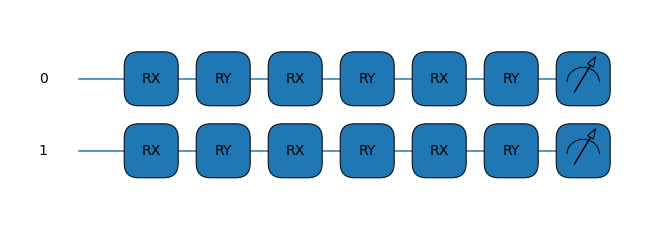

In [5]:
iris.draw_circuit()

In [6]:
iris.optimize()

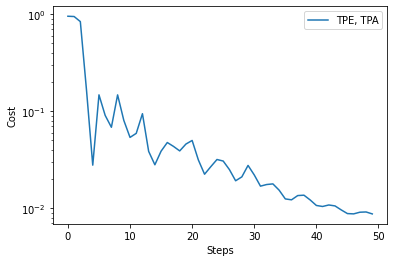

In [7]:
iris.plot_cost()

In [8]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.008721263373939183


## Train with 4 features

In [9]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.85 0.35 2.05 0.75] 1.0
[0.4  0.75 0.2  0.1 ] -1.0
[0.6  0.3  1.7  0.55] 1.0


In [11]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

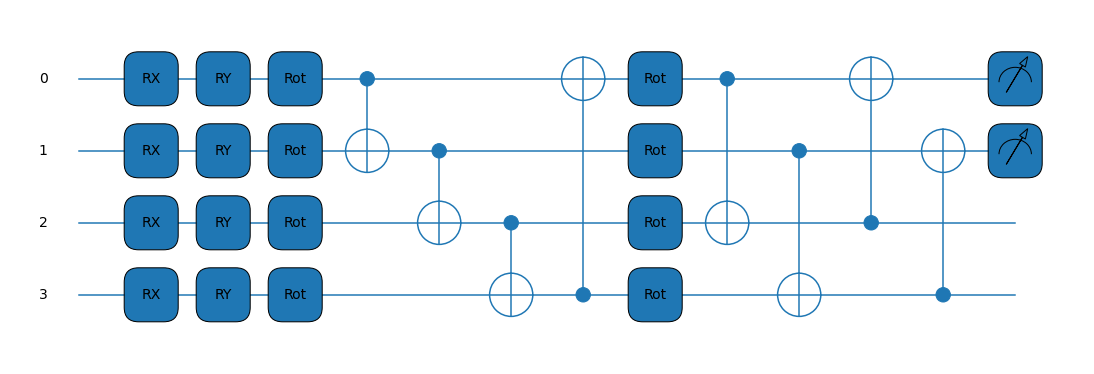

In [12]:
iris.draw_circuit()

In [13]:
iris.optimize()

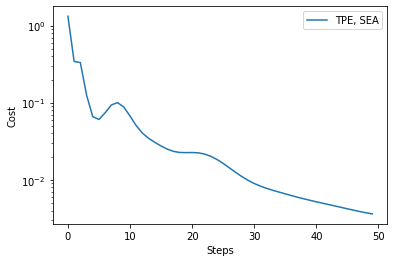

In [14]:
iris.plot_cost()

In [15]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.0036206173645324073


## Circuit structure and cost

In [16]:
from sklearn.model_selection import train_test_split
from structure_effect_on_trainability import *

data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [19]:
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 50

optimized_cost_acc_iris, cost_all_iris = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, embedding_nlayers, ansatz_nlayers, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


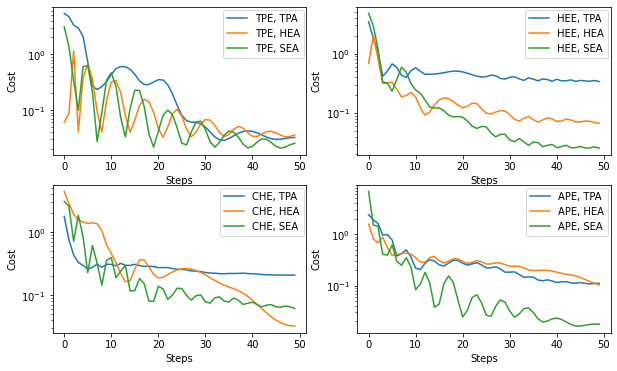

In [20]:
plot_cost(cost_all_iris)

In [21]:
sort_cost_acc(cost_type, optimized_cost_acc_iris)

LOG
embedding_type: APE, ansatz_type: SEA: cost 0.017656670932380075
embedding_type: TPE, ansatz_type: SEA: cost 0.025400848904150473
embedding_type: HEE, ansatz_type: SEA: cost 0.025468286138240863
embedding_type: TPE, ansatz_type: TPA: cost 0.03226962625770859
embedding_type: CHE, ansatz_type: HEA: cost 0.032270301083135014
embedding_type: TPE, ansatz_type: HEA: cost 0.03594380430480563
embedding_type: CHE, ansatz_type: SEA: cost 0.06122273025331888
embedding_type: HEE, ansatz_type: HEA: cost 0.06726885058694734
embedding_type: APE, ansatz_type: HEA: cost 0.10248539393776128
embedding_type: APE, ansatz_type: TPA: cost 0.11031492761953758
embedding_type: CHE, ansatz_type: TPA: cost 0.20824491202779996
embedding_type: HEE, ansatz_type: TPA: cost 0.3380731585455802
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: SEA: accuracy 1.0
embedding_type: HEE, ansatz_type: SEA: accuracy 1.0
embedding_type: CHE, ansatz_type: TPA: accuracy 1.0
embed

## cost vs the number of layers of embedding

In [3]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4 (100,2)
Y = data[:,-1] # last column is the class      (100,1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
nqubits = 2; embedding_nlayers_list = [1,5,10,15,20,25,30]; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
draw = True; shots = None; stepsize = 0.3; steps = 100

optimized_cost_list = []
optimized_acc_list  = []
for embedding_nlayers in embedding_nlayers_list:
    cost_embedding_layers = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots, stepsize, steps)
    cost_embedding_layers.optimize()
    optimized_cost_list.append(cost_embedding_layers.cost_list[-1])
    optimized_acc_list.append(cost_embedding_layers.accuracy(x_test, y_test))

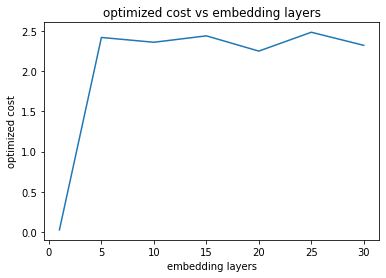

In [5]:
plt.plot(embedding_nlayers_list, optimized_cost_list)
plt.xlabel('embedding layers')
plt.ylabel('optimized cost')
plt.title('optimized cost vs embedding layers')
plt.show()

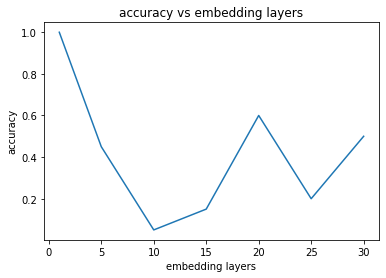

In [6]:
plt.plot(embedding_nlayers_list, optimized_acc_list)
plt.xlabel('embedding layers')
plt.ylabel('accuracy')
plt.title('accuracy vs embedding layers')
plt.show()

### -> many embedding layers make it harder to train the model

## Another dataset (2 features and 4 labels)

In [40]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

In [41]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N).astype(int)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = 0
        else:
            Y[i] = 3
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

print(X[:5])
print(Y[:5])

[[-0.25491844 -0.21993439]
 [ 0.39781532  0.18892273]
 [-0.0205408   0.93297304]
 [ 0.56330823 -0.48101951]
 [ 0.9612272  -0.63076441]]
[2 0 1 3 3]


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4; embedding_nlayers = 1; ansatz_nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

test = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

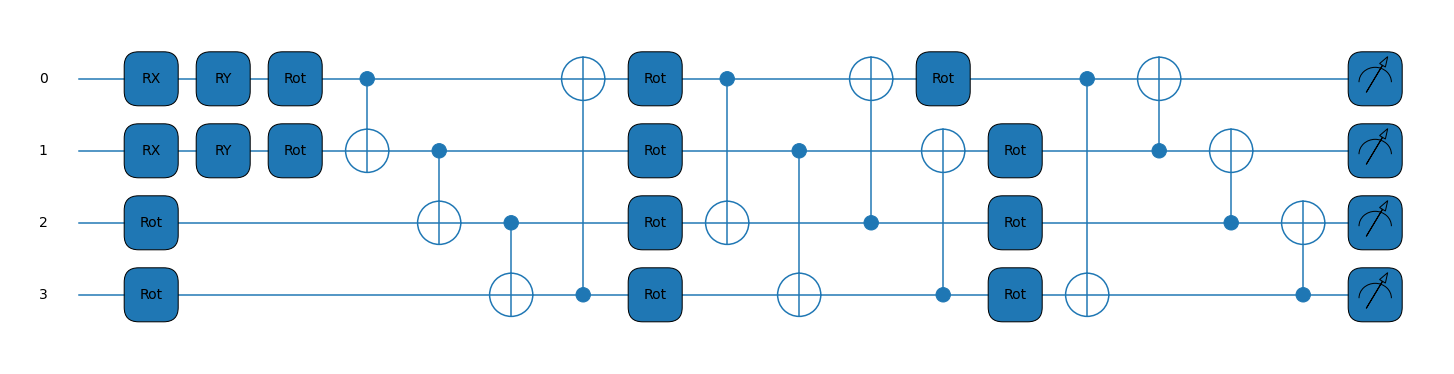

In [43]:
test.draw_circuit()

In [44]:
test.optimize()

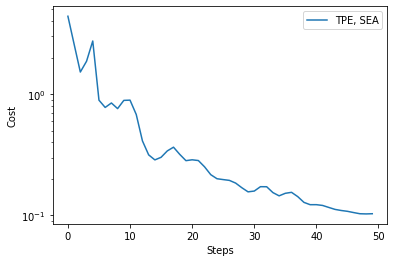

In [45]:
test.plot_cost()

In [46]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.10318840190308216


## Random dataset

In [49]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

In [50]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.random.randint(0, 2, N)

print(X[:5])
print(Y[:5])

[[-0.47031469  0.77095611]
 [ 0.15514777 -0.69061643]
 [-0.87699905  0.86032014]
 [-0.17457314  0.15020231]
 [ 0.01337038  0.96749464]]
[1 0 0 0 1]


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4;  embedding_nlayers = 1; ansatz_nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

test = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

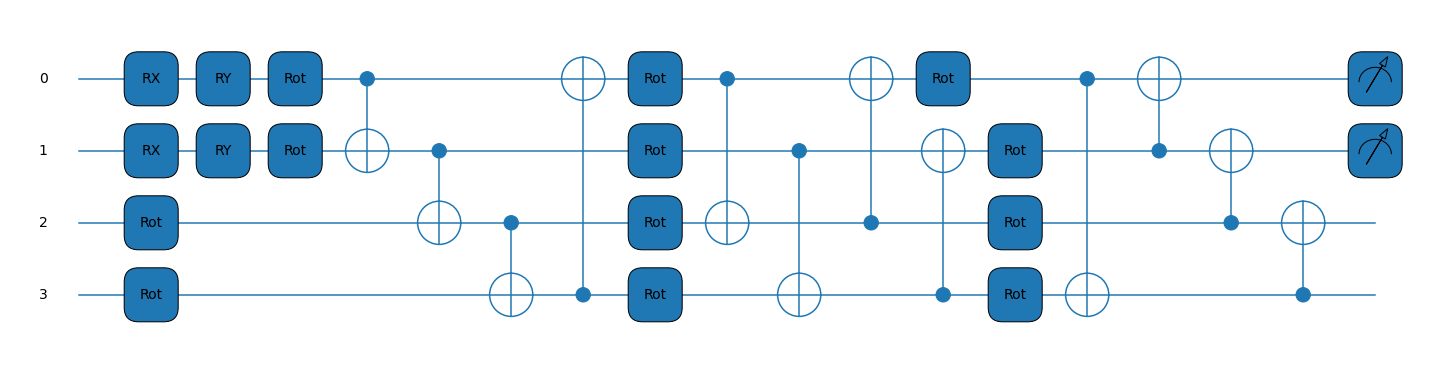

In [52]:
test.draw_circuit()

In [53]:
test.optimize()

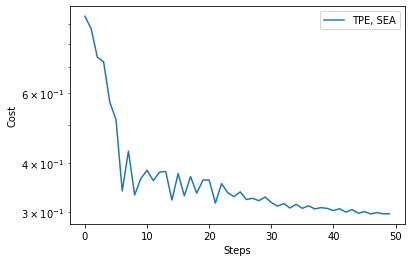

In [54]:
test.plot_cost()

In [55]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  0.6
optimized cost;  0.29753767595195185
